##How to calculate anomaly?

In [1]:
import numpy as np

# Sample data
data = [10, 12, 12, 14, 14, 100, 15, 13, 11, 10]

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate anomaly
anom = [(x - mean) for x in data]

# Calculate standardized anomaly
anom_std = [(x - mean) / std_dev for x in data]

In [2]:
mean

21.1

In [3]:
std_dev

26.349383294490977

In [4]:
anom

[-11.100000000000001,
 -9.100000000000001,
 -9.100000000000001,
 -7.100000000000001,
 -7.100000000000001,
 78.9,
 -6.100000000000001,
 -8.100000000000001,
 -10.100000000000001,
 -11.100000000000001]

In [5]:
anom_std

[-0.4212622312993847,
 -0.34535912656075685,
 -0.34535912656075685,
 -0.26945602182212897,
 -0.26945602182212897,
 2.9943774819388693,
 -0.23150446945281505,
 -0.30740757419144293,
 -0.38331067893007076,
 -0.4212622312993847]

##Calculate the Oceanic Niño Index (ONI) using HadISST dataset

	1.	Obtain the SST Data
The Hadley Center’s HadISST dataset can be downloaded from their official site or accessed via netCDF format (https://www.metoffice.gov.uk/hadobs/hadisst/data/download.html).

	2.	Define the Niño 3.4 Region
  The Niño 3.4 region is bounded by:
  Latitude: 5°N to 5°S
  Longitude: 170°W to 120°W (equivalent to 190°E to 240°E in 0–360° longitude).

	3.	Calculate Monthly SST Anomalies
  For each month, calculate the average SST within the Niño 3.4 region.
	•	Compute a climatology (average SST for each month) based on a 30-year base period (typically 1981–2010 or another standard).
	•	Subtract the monthly climatology from the monthly SSTs to obtain SST anomalies.

	4.	Compute the 3-Month Running Mean
  Apply a 3-month moving average to the SST anomalies. This will smooth out short-term variability, leaving the longer-term trends and anomalies.

	5.	Determine ONI
  The ONI is the 3-month running mean of SST anomalies in the Niño 3.4 region. If the ONI exceeds ±0.5°C for several consecutive months, it indicates the presence of El Niño or La Niña conditions.


In [6]:
!wget https://www.metoffice.gov.uk/hadobs/hadisst/data/HadISST_sst.nc.gz

zsh:1: command not found: wget


In [7]:
!gzip -d HadISST_sst.nc.gz

gzip: can't stat: HadISST_sst.nc.gz (HadISST_sst.nc.gz.gz): No such file or directory


In [8]:
import xarray as xr
import pandas as pd

# Load the SST data (e.g., HadISST dataset in netCDF format)
# Assume the SST data is in a file called 'hadisst.nc' with dimensions [time, lat, lon]
ds = xr.open_dataset('HadISST_sst.nc')

# Define the Niño 3.4 region (5N to 5S, 170W to 120W)
nino34_sst = ds['sst'].sel(latitude=slice(5, -5), longitude=slice(-170, -120))


In [9]:
ds

<xarray.Dataset> Size: 481MB
Dimensions:    (time: 1856, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 2...
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 15kB ...
    sst        (time, latitude, longitude) float32 481MB ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    2/10/2024 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [10]:
nino34_sst

<xarray.DataArray 'sst' (time: 1856, latitude: 10, longitude: 50)> Size: 4MB
[928000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 2...
  * latitude   (latitude) float32 40B 4.5 3.5 2.5 1.5 ... -1.5 -2.5 -3.5 -4.5
  * longitude  (longitude) float32 200B -169.5 -168.5 -167.5 ... -121.5 -120.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [11]:
# Calculate the monthly climatology (1981-2010 as an example) and anomalies
climatology_period = nino34_sst.sel(time=slice('1981-01-01', '2010-12-31'))
monthly_climatology = climatology_period.groupby('time.month').mean('time').load()
nino34_sst_anom = nino34_sst.groupby('time.month') - monthly_climatology

In [12]:
nino34_sst_anom

<xarray.DataArray 'sst' (time: 1856, latitude: 10, longitude: 50)> Size: 4MB
array([[[-5.30212402e-01, -5.70751190e-01, -6.60737991e-01, ...,
         -1.06158257e+00, -1.14402199e+00, -1.19079018e+00],
        [-5.15089035e-01, -5.48912048e-01, -6.39793396e-01, ...,
         -1.00862503e+00, -1.08363533e+00, -1.13271523e+00],
        [-6.05939865e-01, -6.02645874e-01, -6.64558411e-01, ...,
         -1.14080620e+00, -1.18688202e+00, -1.23937607e+00],
        ...,
        [-5.09654999e-01, -4.79001999e-01, -4.06129837e-01, ...,
         -1.23443604e+00, -1.22978020e+00, -1.23693466e+00],
        [-4.25018311e-01, -3.85852814e-01, -3.02860260e-01, ...,
         -1.11687851e+00, -1.14390182e+00, -1.15300369e+00],
        [-4.45289612e-01, -4.10575867e-01, -3.38977814e-01, ...,
         -1.18641281e+00, -1.22091103e+00, -1.22886848e+00]],

       [[-1.15809822e+00, -1.19705963e+00, -1.29838753e+00, ...,
         -1.01151085e+00, -1.09212685e+00, -1.18062973e+00],
        [-1.14495659e+00, -1.18325424e+00, -1.28589439e+00, ...,
         -9.47507858e-01, -1.02947998e+00, -1.12051582e+00],
        [-1.19681931e+00, -1.20797348e+00, -1.26580811e+00, ...,
         -1.02186775e+00, -1.08872032e+00, -1.16770744e+00],
...
         -1.10082626e-01, -1.07345581e-01, -1.18579865e-01],
        [ 5.38269043e-01,  5.12002945e-01,  4.76720810e-01, ...,
         -2.54745483e-02,  1.35803223e-03, -1.45587921e-02],
        [ 5.60930252e-01,  5.46171188e-01,  5.26920319e-01, ...,
          2.68917084e-02,  6.14757538e-02,  4.99725342e-02]],

       [[ 3.17796707e-01,  3.54875565e-01,  3.57917786e-01, ...,
         -1.01648331e-01, -1.03931427e-02, -5.80024719e-03],
        [ 3.15206528e-01,  3.19807053e-01,  3.04458618e-01, ...,
         -2.64579773e-01, -1.24130249e-01, -6.44741058e-02],
        [ 3.35515976e-01,  2.72474289e-01,  2.51615524e-01, ...,
         -4.34711456e-01, -2.52319336e-01, -1.27794266e-01],
        ...,
        [ 3.72276306e-01,  3.60097885e-01,  3.50706100e-01, ...,
         -3.17169189e-01, -3.48564148e-01, -3.78778458e-01],
        [ 3.88502121e-01,  3.88324738e-01,  3.73239517e-01, ...,
         -2.50463486e-01, -2.47314453e-01, -2.75386810e-01],
        [ 4.04245377e-01,  4.16952133e-01,  4.08498764e-01, ...,
         -1.98556900e-01, -1.77721024e-01, -1.96443558e-01]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 2...
  * latitude   (latitude) float32 40B 4.5 3.5 2.5 1.5 ... -1.5 -2.5 -3.5 -4.5
  * longitude  (longitude) float32 200B -169.5 -168.5 -167.5 ... -121.5 -120.5
    month      (time) int64 15kB 1 2 3 4 5 6 7 8 9 10 ... 11 12 1 2 3 4 5 6 7 8

In [13]:
# Calculate the area-weighted average SST anomaly over the Niño 3.4 region
weights = np.cos(np.deg2rad(nino34_sst_anom['latitude']))  # Latitude weighting
sst_weighted_mean = nino34_sst_anom.weighted(weights).mean(dim=['latitude', 'longitude'])

# Apply a 3-month running mean to calculate the ONI
oni = sst_weighted_mean.rolling(time=3, center=True).mean()
oni

<xarray.DataArray 'sst' (time: 1856)> Size: 7kB
array([       nan, -1.0103767, -0.9431513, ...,  0.2774964,  0.1482581,
              nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 202...
    month    (time) int64 15kB 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8

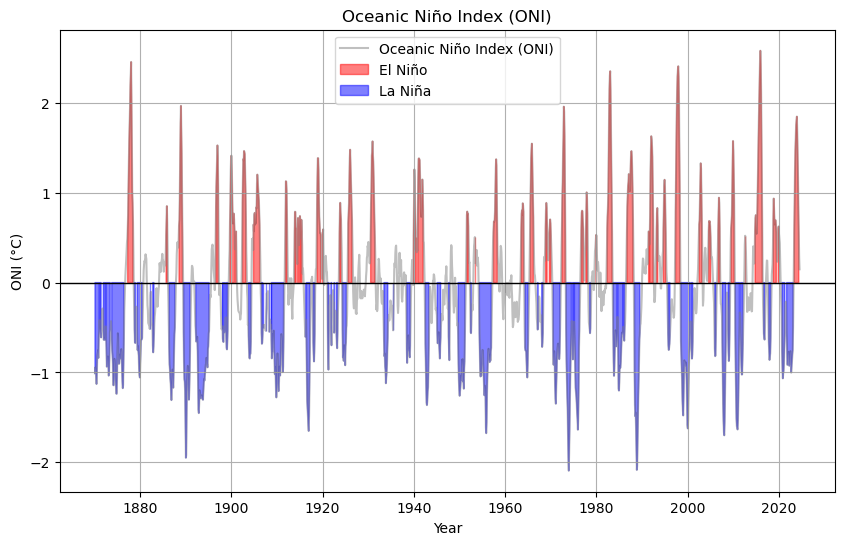

In [14]:
import matplotlib.pyplot as plt

# Plot ONI
plt.figure(figsize=(10, 6))
plt.plot(oni.time, oni, label='Oceanic Niño Index (ONI)', color='gray',alpha = 0.5)
plt.axhline(0, color='k', lw=1)  # Zero line
plt.fill_between(oni.time, oni, where=(oni > 0.5), color='r', alpha=0.5, label="El Niño")
plt.fill_between(oni.time, oni, where=(oni < -0.5), color='b', alpha=0.5, label="La Niña")
plt.title("Oceanic Niño Index (ONI)")
plt.xlabel("Year")
plt.ylabel("ONI (°C)")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Convert ONI from xarray to pandas DataFrame
oni_df = oni.sel(time=slice('1981-01-01', '2024-12-31')).to_dataframe().reset_index()

# Preview the ONI DataFrame
print(oni_df.head())

                 time  month       sst
0 1981-01-16 12:00:00      1 -0.189155
1 1981-02-15 00:00:00      2 -0.317154
2 1981-03-16 12:00:00      3 -0.220392
3 1981-04-16 00:00:00      4 -0.102353
4 1981-05-16 12:00:00      5 -0.142717


In [34]:
# Load the trade wind dataset (replace '10m-uwind.nc' with the actual path)
wind_data = xr.open_dataset('10m-uwind.nc')['u10']

# Select the Pacific Ocean region and average over Pacific.
# Here, adjust lat/lon according to the wind dataset.
wind_region = wind_data.sel(latitude=slice(5, -5), longitude=slice(150, 240))

# Average over latitude and longitude to get a time series of trade winds for the region
trade_wind = wind_region.mean(dim=['latitude', 'longitude'])

# Convert 'date' from YYYYMMDD format to datetime format using pandas
trade_wind['date'] = pd.to_datetime(trade_wind['date'].values.astype(str), format='%Y%m%d')
# Rename 'date' coordinate to 'time'
trade_wind = trade_wind.rename({'date': 'time'})

In [35]:
# Obtain the anomalies of the trade wind
trade_wind_climatology_period = trade_wind.sel(time=slice('1981-01-01', '2010-12-31'))
trade_wind_monthly_climatology = trade_wind_climatology_period.groupby('time.month').mean('time').load()
trade_wind_anom = trade_wind.groupby('time.month') - trade_wind_monthly_climatology

# Convert trade wind data into a DataFrame
trade_wind_df = trade_wind_anom.sel(time=slice('1981-01-01', '2023-12-31')).to_dataframe().reset_index()

In [36]:
print(trade_wind_df.head())

        time  number expver  month       u10
0 1981-01-01       0   0001      1 -0.712545
1 1981-02-01       0   0001      2  0.144173
2 1981-03-01       0   0001      3  0.612032
3 1981-04-01       0   0001      4  0.017380
4 1981-05-01       0   0001      5 -1.019580


In [53]:
# Standardize both time columns to 'YYYY-MM-01' to represent monthly data
oni_df['time'] = oni_df['time'].dt.to_period('M').dt.to_timestamp()
trade_wind_df['time'] = trade_wind_df['time'].dt.to_period('M').dt.to_timestamp()

# Now merge the two DataFrames on the 'time' column
merged_df = pd.merge(oni_df, trade_wind_df, on='time', how='inner')

# Check the merged DataFrame
print(merged_df.head())

        time  month_x       sst  number expver  month_y       u10
0 1981-01-01        1 -0.189155       0   0001        1 -0.712545
1 1981-02-01        2 -0.317154       0   0001        2  0.144173
2 1981-03-01        3 -0.220392       0   0001        3  0.612032
3 1981-04-01        4 -0.102353       0   0001        4  0.017380
4 1981-05-01        5 -0.142717       0   0001        5 -1.019580


                            OLS Regression Results                            
Dep. Variable:                    u10   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     1196.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          2.71e-136
Time:                        17:36:52   Log-Likelihood:                -481.32
No. Observations:                 516   AIC:                             966.6
Df Residuals:                     514   BIC:                             975.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1383      0.027     -5.098      0.0

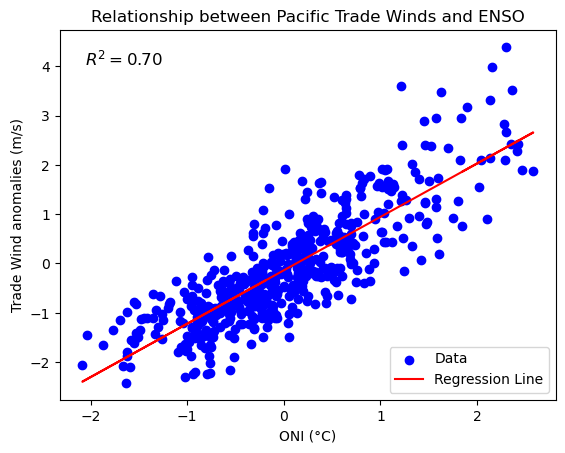

In [57]:
import statsmodels.api as sm

# Define independent (ONI) and dependent (Trade Wind) variables
X = merged_df['sst']
y = merged_df['u10']

# Add a constant term to the independent variable (for intercept in regression)
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Scatter plot of ONI vs. trade winds with regression line
plt.scatter(merged_df['sst'], merged_df['u10'], label='Data', color='blue')
plt.plot(merged_df['sst'], model.predict(X), color='red', label='Regression Line')

# Annotate the R-squared value on the plot
r_squared = model.rsquared
plt.text(0.05, 0.95, f'$R^2 = {r_squared:.2f}$', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', color='black')

plt.title('Relationship between Pacific Trade Winds and ENSO')
plt.xlabel('ONI (°C)')
plt.ylabel('Trade Wind anomalies (m/s)')
plt.legend()
plt.show()